In [1]:
import numpy as np
import pandas as pd

## Plotting
This notebook covers the following topics:
* matplotlib
* Line plots
* Scatter plots
* 1D and 2D histograms
* Subplots
* Good practice

# Matplotlib

`matplotlib` is an extensive module that contains classes and methods for plotting. It works in conjunction with most common modules for data processing and numerical manipulation, such as `numpy` and `pandas`. For detailed information regarding all aspects discussed in this introduction, look up the official documentation at https://matplotlib.org.

__Note:__ `matplotlib` offers a _lot_ of possibilities for plotting, most of which can't be covered in this short introduction. 

### Preparations

`matplotlib` is usually not imported as a whole, but rather one of its parts, namely `matplotlib.pyplot`. It is usually imported with the alias `plt`. Also, when used in conjunction with a *jupyter notebook*, additional settings are required which are invoked with either `%matplotlib inline` (for rastered plots that are rendered inline) or `%matplotlib notebook` (for interactive plots using javascript and HTML5).

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

### Common Functions

* `plt.figure` is used to invoke a new canvas in which to draw plots in. The size of the canvas can be adjusted using the keyword `figsize=(width/inch, height/inch)`.

* `plt.show` can be used to display a figure when working interactively. 

* `plt.savefig(filename)` can be used to save a figure as a file with format specified by the extension (mostly *png* or *pdf*).

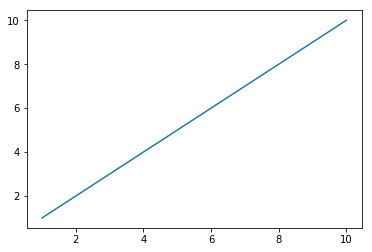

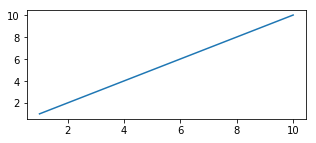

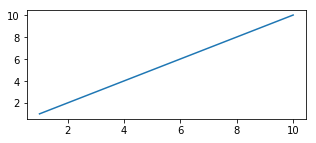

In [3]:
# Create an array to be plotted
x = np.linspace(1, 10, 10)

# Create a default figure, plot the array and show it
plt.figure()
plt.plot(x,x)
plt.show()

# The same as before, but now the figure has a different size
plt.figure(figsize=(5,2))
plt.plot(x,x)
plt.show()

# Now save the figure
plt.figure(figsize=(5,2))
plt.plot(x,x)
plt.savefig('FirstFigure.pdf')

## Line Plots

`plt.plot(x, y, *args, **kwargs)` is used for traditional plots involving (sorted!) pairs of data `x` and `y`. Let's look at a very simple example: Let's plot the functions $f_1(t) = t^2 \sin(4t)$ and $f_2(t) = t^2 \sin(6t)$ in $t\in[0,3]$.

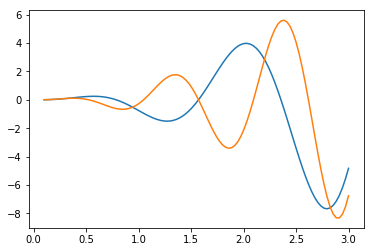

In [4]:
t = np.linspace(0.1, 3.0, 100)
y_1 = t ** 2 * np.sin(4.0 * t)
y_2 = t ** 2 * np.sin(6.0 * t)

plt.figure()
plt.plot(t, y_1)
plt.plot(t, y_2)
plt.show()

## Legends, Labels and Adjusting Axes
To introduce a legend to your plot, you can use `plt.legend()`. The name of the different objects in your plot can be specified using the keyword `label`.

The labels of your axes can be set using `plt.xaxis(label)` and `plt.yaxis(label)`. Note that all labels have rudimentary LaTeX support.

The ranges of the axes can be modified using `plt.xlim([lower, upper])` and `plt.ylim([lower, upper])`. It is also possible to set a logarithmic scale to each of the axes using `plt.xscale('log')` or `plt.yscale('log')`.

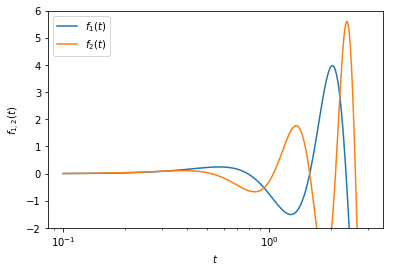

In [5]:
plt.figure()
plt.plot(t, y_1, label='$f_1(t)$')
plt.plot(t, y_2, label='$f_2(t)$')
plt.legend()

plt.ylim([-2.0, 6.0])
plt.xscale('log')

plt.xlabel('$t$')
plt.ylabel('$f_{1,2}(t)$')

plt.show()

#### Common Options

Often one would like to customise plots, such as the style and colour of the plots. This can easily be done using keyword arguments for `plt.plot` such as:

* `plt.plot(..., color=[color])` 
This forces the respective line to have a certain predefined color. Common colours are:
    * Name: `black`, `red`, `blue`, `green` (and many more:  https://matplotlib.org/examples/color/named_colors.html)
    * `C[i]`: The $i$-th color Matplotlib picks by default, if no color is specified
    * Hexcode: HTML-style hexcode, like `#ff0000` for red for any custom RGB-color
* `plt.plot(..., linestyle=[linestyle])` This forces the respective line to have a certain linestyle. Commone linestyles:
    * `'-'` straight line, which is default.
    * `'--'` dashed line
    * `':'` dotted line
    * `'-.'` dashed/dotted line
* `plt.plot(..., marker=[marker])` The marker to be used, such as
    * `'.'`  dot.
    * `'o'`  circle.
    * `'s'`  square.
    * `'+'`  cross.
    * `'d'`  diamond.
* `plt.plot(..., linewidth=[linewidth])` The width of the lines in units of pt
* `plt.plot(..., markersize=[markersize])` The size of the marker in units of pt


#### Some Examples
Here are some generic examples showing a few of the features provided by `plt.plot`:

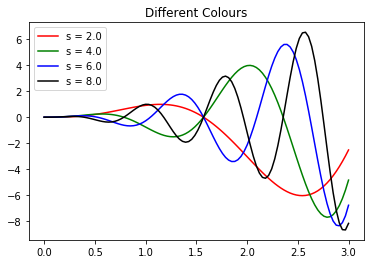

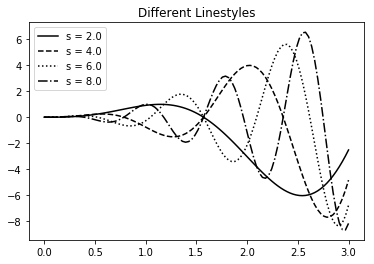

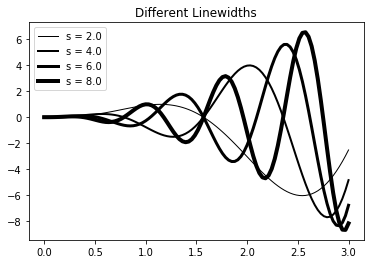

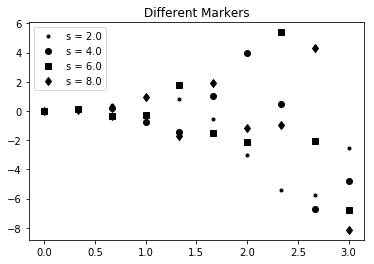

In [6]:
t = np.linspace(0.0, 3.0, 100)
s_vals = [2.0, 4.0, 6.0, 8.0]

plt.figure()
for s, c in zip(s_vals, ['red', 'green', 'blue', 'black']):
    y = t ** 2 * np.sin(s * t)
    plt.plot(t, y, color=c, label='s = {:.1f}'.format(s))
plt.legend()
plt.title('Different Colours')
plt.show()

plt.figure()
for s, ls in zip(s_vals, ['-', '--', ':', '-.']):
    y = t ** 2 * np.sin(s * t)
    plt.plot(t, y, color='black', linestyle=ls, label='s = {:.1f}'.format(s))
plt.legend()
plt.title('Different Linestyles')
plt.show()

plt.figure()
for s, lw in zip(s_vals, [1.0, 2.0, 3.0, 4.0]):
    y = t ** 2 * np.sin(s * t)
    plt.plot(t, y, color='black', linewidth=lw, label='s = {:.1f}'.format(s))
plt.legend()
plt.title('Different Linewidths')
plt.show()

t = np.linspace(0.0, 3.0, 10)

plt.figure()
for s, m in zip(s_vals, ['.', 'o', 's', 'd']):
    y = t ** 2 * np.sin(s * t)
    plt.plot(t, y, color='black', marker=m, linestyle='', label='s = {:.1f}'.format(s))
plt.legend()
plt.title('Different Markers')
plt.show()

## Errorbars

Plots containing errorbars can be produced using the method `plt.errorbar(x, y, x_unc, y_unc)`. For whatever reason, `plt.errorbar` connects the data points with lines. That can be turned off by using `linestyle=''`.

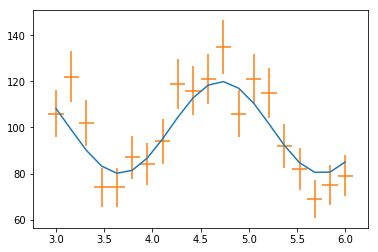

In [7]:
t = np.linspace(3.0, 6.0, 20)
y = 20.0 * np.sin(3.0 * t) + 100.0
y_randomized = np.random.poisson(y)

plt.figure()
plt.plot(t, y)
plt.errorbar(t, y_randomized, np.sqrt(y_randomized), np.diff(t)[0] * 0.5, linestyle='')
plt.show()

Similar to `plt.plot`, `plt.errorbar` supports the keywords `color`, `linewidth`, `linestyle`, `marker` and `markersize` (among others).

## Histograms

Histograms can be produced using the method `plt.hist(data, bins)`. The keyword `bins` is allowed to be either
* An integer $n$: In this case, the space between `max(data)` and `min(data)` is divided into $n$ equidistant bins.
* A (sorted!) array: In this case, the array is interpreted as the edges of the bins used in the histogram. Keep in mind that `len(bins)` corresponds to 1 + `n_bins` in this case.

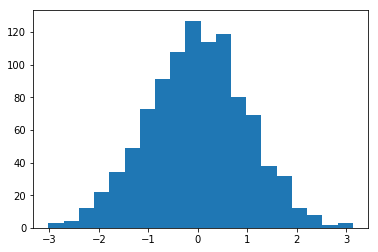

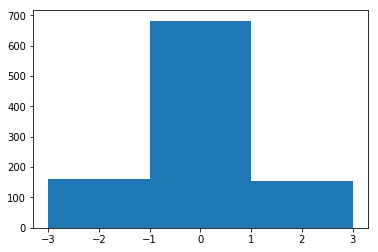

In [8]:
random_numbers = np.random.randn(1000)

# Create a histogram with 20 bins
plt.figure()
plt.hist(random_numbers, 20)
plt.show()

# Create a histogram with bins from -3 to -1, -1 to 1, 1 to 3. So 3 bins in total.
plt.figure()
plt.hist(random_numbers, [-3,-1,1,3])
plt.show()

#### Common Options

* `plt.hist(..., histtype=[histtype])`: The `histtype` determines the style of histogram.
    * `bar`: Default, plain, filled bars.
    * `barstacked`: Like above, but successive histograms with this option will be stacked on top of another.
    * `step`: Just bare lines with no fill.
    * `stepfilled`: Like above, but with additional fill.
* `plt.hist(..., density=[density])`: Either `True` or `False`, this option normalizes the histogram, so that the area below (integral) is one.
* `plt.hist(..., weights=[weights])`: `weights` is an array of the same length as `data`.

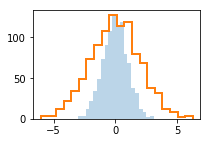

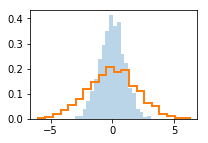

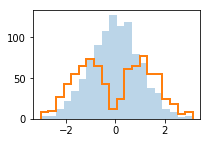

In [9]:
# Different histtypes
plt.figure(figsize=(3,2))
plt.hist(random_numbers, 20, histtype='stepfilled', alpha=0.3)
plt.hist(2*random_numbers, 20, histtype='step', linewidth=2)
plt.show()

# Apply normalisation
plt.figure(figsize=(3,2))
plt.hist(random_numbers, 20, histtype='stepfilled', alpha=0.3, density=True)
plt.hist(2*random_numbers, 20, histtype='step', linewidth=2, density=True)
plt.show()

# Weighting every event with its absolute value
plt.figure(figsize=(3,2))
plt.hist(random_numbers, 20, histtype='stepfilled', alpha=0.3)
plt.hist(random_numbers, 20, histtype='step', linewidth=2, weights=np.abs(random_numbers))
plt.show()

## Histograms with Errorbars

Very commonly one wants to plot histograms with errorbars. Therefore, you'll need the contents of each bin and the bin edges. You can use for example the `numpy` method `np.histogram`. It works in the same way as `plt.hist`.

In [10]:
random_numbers = np.random.randn(1000)

histogram, bin_edges = np.histogram(random_numbers, 20)
bin_mids = (bin_edges[1:] + bin_edges[:-1]) * 0.5

print('Histogram: \n', histogram)
print('Bin edges: \n', bin_edges)
print('Bin mids: \n', bin_mids)

Histogram: 
 [  5   1   7  13  42  44  67 103 131 118 117 108  84  60  46  25  18   5
   3   3]
Bin edges: 
 [-3.07100657 -2.76177888 -2.45255119 -2.1433235  -1.83409581 -1.52486812
 -1.21564043 -0.90641274 -0.59718505 -0.28795736  0.02127033  0.33049802
  0.63972571  0.9489534   1.25818109  1.56740878  1.87663647  2.18586416
  2.49509185  2.80431954  3.11354723]
Bin mids: 
 [-2.91639272 -2.60716503 -2.29793734 -1.98870965 -1.67948196 -1.37025427
 -1.06102658 -0.7517989  -0.44257121 -0.13334352  0.17588417  0.48511186
  0.79433955  1.10356724  1.41279493  1.72202262  2.03125031  2.340478
  2.64970569  2.95893338]


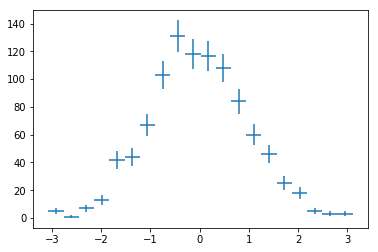

In [11]:
plt.figure()
plt.errorbar(bin_mids, histogram, np.sqrt(histogram), np.diff(bin_edges) * 0.5, linestyle='')
plt.show()

## Two-dimensional Histograms

Often the relation between two quantities is of interest, e.g. to visualise correlations. This can be achieved using `plt.hist2d(x_data, y_data, bins)`, whereas bins is either a tuple of two integers specifiying the number of bins in each dimension, or a tuple of arrays specifying the bin edges.

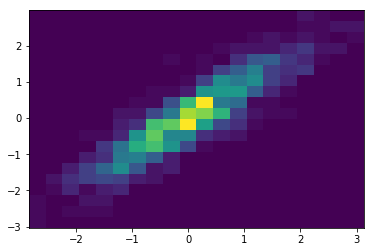

In [12]:
random_numbers = np.random.multivariate_normal(size=1000, mean=[0.0, 0.0], 
                                               cov=[[1.0, 0.9],[0.9, 1.0]])

plt.figure()
plt.hist2d(random_numbers[:,0], random_numbers[:,1], (20, 20))
plt.show()

#### Common Options and Colorbars

Similar to `plt.hist`, `plt.hist2d` has support for weights and normalisation. Since a two-dimensional histogram is a colorplot, it also relies on a colormap that assigns every bin content to a specific color. It can be chosen using the keyword `cmap`. The default colormap is called `viridis`, but there are many other colormaps available, see https://matplotlib.org/tutorials/colors/colormaps.html.

Further, it is usually instructive to add a colorbar to the histogram. This can be achieved using `plt.colorbar()`. A label for the colorbar can be added using the keyword `label`.

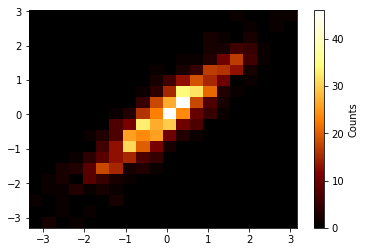

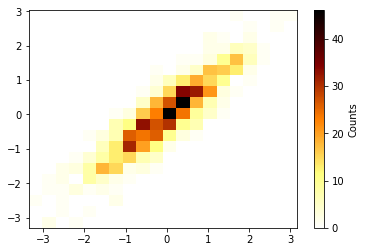

In [13]:
random_numbers = np.random.multivariate_normal(size=1000, mean=[0.0, 0.0], 
                                               cov=[[1.0, 0.9],[0.9, 1.0]])

plt.figure()
plt.hist2d(random_numbers[:,0], random_numbers[:,1], (20, 20), cmap='afmhot')
plt.colorbar(label='Counts')
plt.show()

# You can also invert each colorbar by adding '_r'
plt.figure()
plt.hist2d(random_numbers[:,0], random_numbers[:,1], (20, 20), cmap='afmhot_r')
plt.colorbar(label='Counts')
plt.show()

## Scatter Plots

Another way to visualise the relation between two quantities are scatter plots. They can be plotted using `plt.scatter(x_data, y_data)`.

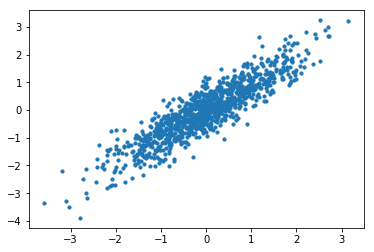

In [14]:
random_numbers = np.random.multivariate_normal(size=1000, mean=[0.0, 0.0], 
                                               cov=[[1.0, 0.9],[0.9, 1.0]])

plt.figure()
plt.scatter(random_numbers[:,0], random_numbers[:,1], s=10)
plt.show()

## Text, Lines and Arrows

It can be very useful to add elements to a plot that contain additional information beyond data points, such as texts, lines or arrows. To achieve that the following methods are useful:

* `plt.text(x, y, s)`: Display the string `s` at Position `x,y`.
* `plt.arrow(x, y, dx, dy)`: Display an arrow starting at `x,y` with the size `dx,dy`.
* `plt.axvline(x)`: Plot a vertical line at `x`.
* `plt.axhline(y)`: Plot a horizontal line at `y`.

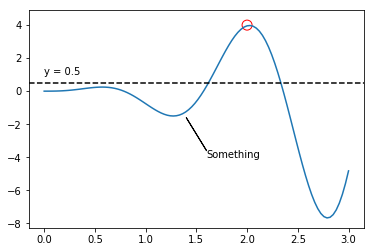

In [15]:
t = np.linspace(0.0, 3.0, 100)
y = t ** 2 * np.sin(4.0 * t)

plt.figure()
plt.plot(t, y)
plt.axhline(0.5, color='black', linestyle='--')
plt.text(0.0, 1.0, 'y = 0.5')
plt.arrow(1.4, -1.6, 0.2, -2.0)
plt.text(1.6, -4.0, 'Something')
plt.scatter(2, 4, s=100, facecolor='', edgecolor='red')
plt.show()

## Subplots
It can be useful to have multiple canvas in a single figure. To do that the method `plt.subplots(nrows, ncols)` can be used instead of `plt.figure` to create a figure composed of multiple canvas. It also supports the keyword `figsize` and can be adjusted to share the axes of surrounding subplots using `sharex` and `sharey`.

As figures with many subplots often get very messy, it's advisable to call `tight_layout` to clean up the figure.

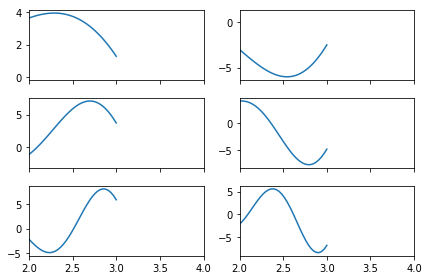

In [16]:
fig, ax = plt.subplots(3, 2, sharex=True)
s = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
for i in range(6):
    t = np.linspace(0.0, 3.0, 100)
    y = t ** 2 * np.sin(s[i] * t)
    idx = np.unravel_index(i, (3, 2))
    ax[idx].plot(t, y)
plt.tight_layout()
ax[0][1].set_xlim([2,4])
plt.show()

Note that for some reason all methods used to manipulate the axes of a canvas change when using subplots:
`plt.xlim(...)` becomes `ax[idx].set_xlim(...)` and so forth. 

### Good Practice
The more complex the plots might get, you will probably also use functions, classes and similar.
Therefore, it is handy to have specific objects at hand (e.g. `Figure` and `Axes`). These can be passed to functions or classes, which can in turn return them. Afterwards, you can still add further stuff, as for example labels etc.
Commonly, they are called `fig` and `ax`.

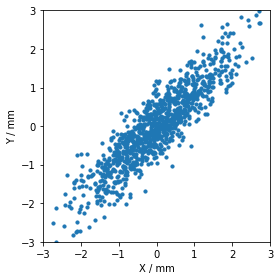

In [17]:
fig = plt.figure(figsize=(4,4))
# Get / create the axes of the figure
ax = plt.gca() 

# Now we use directly the axes object for plotting
# The plotting functions are the same as before
# The `rasterized` option is important if you want to store e.g. scatter plots.
# With this option, not every single point is stored (
# and you might have a lot!), which are mostly overlayed by each other.
# Instead "the overall image" is stored.
ax.scatter(random_numbers[:,0], random_numbers[:,1], 
           s=10, rasterized=True)

# Correspindingly we use the axes object for adding labels etc.
# The names of the functions are a bit different, 
# but functionality is the same. 
# Instead of 'plt.xlabel' we use 'ax.set_xlabel' and so on...
ax.set_xlabel('X / mm')
ax.set_ylabel('Y / mm')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

fig.tight_layout()

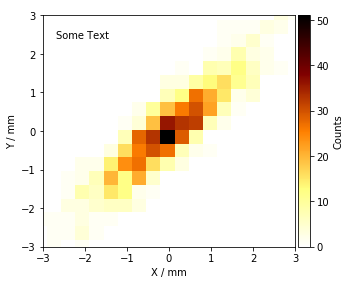

In [18]:
fig = plt.figure(figsize=(5,4))
ax = plt.gca()

_, _, _, img = ax.hist2d(random_numbers[:,0], 
                         random_numbers[:,1], 
                         (20, 20), cmap='afmhot_r')

ax.set_xlabel('X / mm')
ax.set_ylabel('Y / mm')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

ax.text(0.05, 0.9, 'Some Text',
       transform=ax.transAxes)


cb = fig.colorbar(img, label='Counts', pad=0.01)

fig.tight_layout()
fig.savefig('AnotherFigure.pdf')

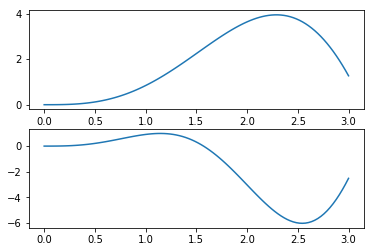

In [19]:
# `plt.subplots()`
fig, ax = plt.subplots(2, 1)

t = np.linspace(0.0, 3.0, 100)
y1 = t ** 2 * np.sin(1 * t)
y2 = t ** 2 * np.sin(2 * t)

ax[0].plot(t, y1)
ax[1].plot(t, y2)

plt.show()

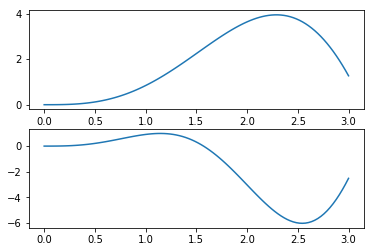

In [20]:
# Alternative: `add_subplot()`
# This method also provides projections
fig = plt.figure()

ax = fig.add_subplot(2, 1, 1)
ax.plot(t, y1)

ax = fig.add_subplot(2, 1, 2)
ax.plot(t, y2)

plt.show()